# Clustering en el conjunto de datos

## 1. Preparar los Datos

Primero, asegúrate de tener las bibliotecas necesarias:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generar datos ficticios
np.random.seed(0)
fechas = pd.date_range(start='2022-01-01', periods=200, freq='D')
categorias = ['Comida para Perros', 'Comida para Gatos', 'Comida para Aves', 'Comida para Peces']
data = {
    'Fecha': np.random.choice(fechas, 1000),
    'Categoria': np.random.choice(categorias, 1000),
    'Ventas': np.random.randint(100, 1000, 1000),
    'Ingresos': np.random.uniform(1000, 10000, 1000),
    'Promociones': np.random.randint(0, 20, 1000),
    'Descuento': np.random.uniform(0, 0.3, 1000)
}

df = pd.DataFrame(data)


## 2. Preprocesar los Datos

Seleccionaremos características relevantes para el clustering y escalaremos los datos:

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionar características para clustering
X = df[['Ventas', 'Ingresos', 'Promociones', 'Descuento']]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 3. Aplicar K-Means

Definimos el número de clusters y aplicamos el algoritmo K-Means:

In [ ]:
# Definir el número de clusters
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Agregar el resultado del clustering al DataFrame
df['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 4. Visualizar los Resultados del Clustering

Podemos visualizar los resultados del clustering en un gráfico 2D usando dos de las características:

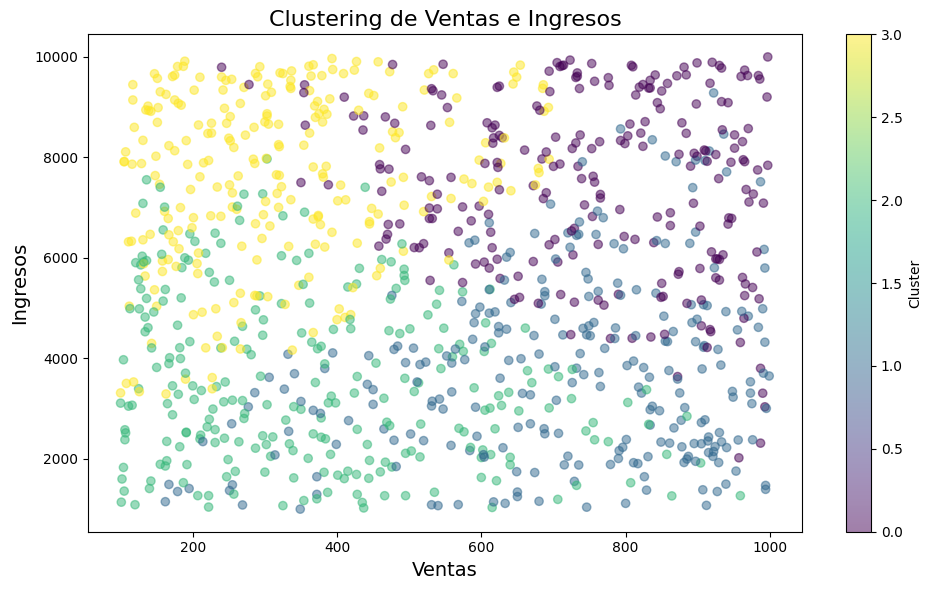

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Ventas'], df['Ingresos'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.title("Clustering de Ventas e Ingresos", fontsize=16)
plt.xlabel("Ventas", fontsize=14)
plt.ylabel("Ingresos", fontsize=14)
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()


## 5. Análisis de Resultados de Clustering

Ahora puedes analizar cada cluster:

In [ ]:
cluster_summary = df.groupby('Cluster').agg({
    'Ventas': 'mean',
    'Ingresos': 'mean',
    'Promociones': 'mean',
    'Descuento': 'mean',
    'Categoria': lambda x: x.mode()[0]  # Categoría más frecuente
}).reset_index()

print(cluster_summary)


   Cluster      Ventas     Ingresos  Promociones  Descuento  \
0        0  749.445378  7470.338112     5.449580   0.160297   
1        1  714.431907  3782.606187    13.914397   0.130446   
2        2  371.403101  3577.608661     4.492248   0.140365   
3        3  319.627530  7597.099120    12.603239   0.144882   

            Categoria  
0   Comida para Peces  
1   Comida para Gatos  
2  Comida para Perros  
3  Comida para Perros  


## Interpretación de Cada Cluster
### Cluster 0: Comida para Peces
Ventas Altas: Este cluster presenta el mayor promedio de ventas (749.45).

Ingresos Relativamente Altos: Los ingresos también son significativos (7470.34).

Bajas Promociones: Con un promedio de 5.45 promociones, indica una estrategia menos agresiva en términos de descuentos.

Descuento Moderado: Un descuento promedio de 16% sugiere que aunque no se promueve agresivamente, hay cierta estrategia de precios en juego.

### Cluster 1: Comida para Gatos
Ventas Estables: Ventas medias (714.43), que son relativamente consistentes.

Ingresos Moderados: Ingresos mucho más bajos en comparación con el Cluster 0 (3782.61), lo que podría indicar menor volumen de ventas o menor margen.

Alta Promoción: Este cluster tiene el mayor número de promociones (13.91), sugiriendo un enfoque de marketing activo.

Descuento Bajo: Un descuento promedio de 13% podría indicar que se busca mantener el precio.

### Cluster 2: Comida para Perros

Ventas Bajas: Con un promedio de 371.40, es el cluster con menos ventas.

Ingresos Aparentemente Bajo: Ingresos similares al Cluster 1 (3577.61), a pesar de tener menos ventas, posiblemente indicando márgenes bajos.

Pocas Promociones: La cantidad de promociones es baja (4.49), lo que podría sugerir una falta de interés en impulsar ventas a través de descuentos.

Descuento Moderado: Un 14% de descuento puede no ser suficiente para aumentar las ventas.

### Cluster 3: Comida para Perros (Otro Segmento)
Ventas Muy Bajas: Este cluster tiene las menores ventas (319.63).

Ingresos Altos: A pesar de las bajas ventas, los ingresos son altos (7597.10), lo que podría indicar precios premium.

Promociones Moderadas: Promociones en un nivel medio (12.60), sugiriendo un enfoque variable en el marketing.

Descuento Bajo: Un 14% de descuento, lo que podría indicar una estrategia más de marca que de volumen.

### Conclusiones Generales

Segmentación del Mercado: Los resultados muestran que hay diferencias significativas en el comportamiento de compra entre los diferentes tipos de comida para mascotas. Esto sugiere que las estrategias de marketing deben ser adaptadas según el cluster.

### Estrategias de Marketing:

Para Comida para Peces y Gatos, se podrían aumentar las promociones para impulsar aún más las ventas.

Para Comida para Perros, tal vez sería necesario revisar la estrategia de precios y promociones para mejorar las ventas.

Decisiones de Inventario: Los clusters pueden ayudar a determinar qué productos se deben mantener en stock y cuáles podrían necesitar ajustes en la estrategia de ventas.

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
np.random.seed(0)
fechas = pd.date_range(start='2022-01-01', periods=200, freq='D')
categorias = ['Comida para Perros', 'Comida para Gatos', 'Comida para Aves', 'Comida para Peces']
data = {
    'Fecha': np.random.choice(fechas, 1000),
    'Categoria': np.random.choice(categorias, 1000),
    'Ventas': np.random.randint(100, 1000, 1000),
    'Ingresos': np.random.uniform(1000, 10000, 1000),
    'Promociones': np.random.randint(0, 20, 1000),
    'Descuento': np.random.uniform(0, 0.3, 1000)
}

df = pd.DataFrame(data)

In [4]:
df_encoded = pd.get_dummies(df, columns=['Categoria'])
df_encoded['Fecha'] = df_encoded['Fecha'].astype('int64')

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded.drop('Fecha', axis=1))

In [6]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
df['Cluster'] = clusters

In [8]:
for i in range(4):
    print(f"Cluster {i}:")
    cluster_data = df[df['Cluster'] == i]
    print(f"Ventas Promedio: {cluster_data['Ventas'].mean():.2f}")
    print(f"Ingresos Promedio: {cluster_data['Ingresos'].mean():.2f}")
    print(f"Promociones Promedio: {cluster_data['Promociones'].mean():.2f}")
    print(f"Descuento Promedio: {cluster_data['Descuento'].mean() * 100:.2f}%")
    print(f"Distribución de Categorías:\n{cluster_data['Categoria'].value_counts(normalize=True) * 100}")
    print("\n")

Cluster 0:
Ventas Promedio: 503.22
Ingresos Promedio: 5422.73
Promociones Promedio: 8.66
Descuento Promedio: 14.67%
Distribución de Categorías:
Categoria
Comida para Aves    100.0
Name: proportion, dtype: float64


Cluster 1:
Ventas Promedio: 552.28
Ingresos Promedio: 5490.55
Promociones Promedio: 9.48
Descuento Promedio: 14.78%
Distribución de Categorías:
Categoria
Comida para Gatos    100.0
Name: proportion, dtype: float64


Cluster 2:
Ventas Promedio: 561.33
Ingresos Promedio: 5571.46
Promociones Promedio: 9.02
Descuento Promedio: 14.63%
Distribución de Categorías:
Categoria
Comida para Peces    100.0
Name: proportion, dtype: float64


Cluster 3:
Ventas Promedio: 526.89
Ingresos Promedio: 5702.65
Promociones Promedio: 9.38
Descuento Promedio: 13.40%
Distribución de Categorías:
Categoria
Comida para Perros    100.0
Name: proportion, dtype: float64




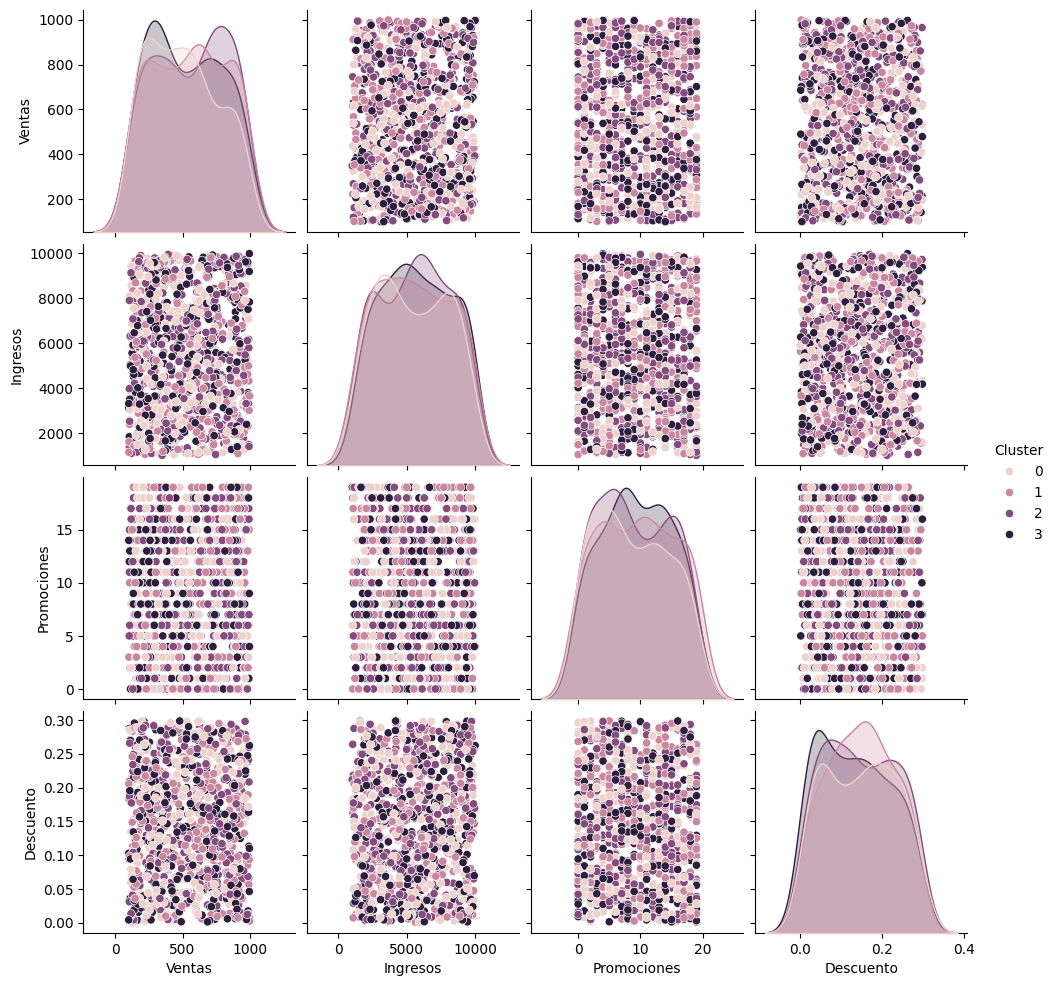

In [9]:
sns.pairplot(df, hue='Cluster', vars=['Ventas', 'Ingresos', 'Promociones', 'Descuento'])
plt.show()


**Cluster 0**

Observando la densidad en las gráficas de las distribuciones individuales, podemos ver que el cluster 0 tiene una alta densidad en la parte superior de las Ventas y Ingresos, indicando que este cluster tiene ventas e ingresos relativamente altos.


**Cluster 1**

El cluster 1 tiene una distribución más uniforme en términos de Ventas y Ingresos, pero muestra una densidad más alta en Promociones, lo que sugiere que este grupo está asociado con un mayor número de promociones.

**Cluster 2:**

Este cluster tiene la menor densidad en términos de Ventas y Ingresos, lo que indica que este grupo tiene ventas e ingresos más bajos. También tiene una baja densidad en Promociones.

**Cluster 3:**

Cluster 3 muestra una densidad intermedia en Ventas e Ingresos, pero es notable que aunque las ventas son bajas, los ingresos son relativamente altos, lo cual sugiere que podrían estar vendiendo productos de mayor precio o margen.

In [10]:
#conclusion

En este grafico  se puede tener una  visión general de cómo las diferentes variables se distribuyen y se relacionan dentro de cada cluster, permitiéndonos identificar características y patrones únicos en cada segmento del mercado. Esta información es crucial para tomar decisiones informadas sobre estrategias de marketing, promociones y precios.